In [62]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline
sns.set()
sns.set_color_codes()

### Reusable functions

Plotting tools

In [63]:
# lets simplify
def label_axes(_ax, _x_label, _y_label, _title):
    _ax.set_xlabel(_x_label, fontsize=14)
    _ax.set_ylabel(_y_label, fontsize=14)
    _ax.set_title(_title, fontsize=14)

In [64]:
data_path = os.environ['ZERG'] + 'data/output_data/{}'

In [65]:
# real_2015 = xr.open_dataset(data_path.format('real_gdp_2015_three_sources.nc'))
# real_2015.coords['source']

In [66]:
da = xr.open_dataarray(data_path.format('real_gdp_2014_four_sources.nc'))

In [67]:
da.coords['source']

<xarray.DataArray 'source' (source: 4)>
array(['imf_weo', 'pwt', 'un', 'wb'], dtype=object)
Coordinates:
  * source   (source) object 'imf_weo' 'pwt' 'un' 'wb'

### Produce time series of real GDP with a common source for 2015

GDP index from different sources * GDP nominal series single source (UNNA)

Use existing dataarray.
1) to calculate real gdp index per source 

    real_gdp_index = da / da.sel(year=base_year_int) 

2) to apply gdp index from different sources to a single source, say UNNA

    real_gdp_index * da.sel(year=2015, source='imf_weo')

In [68]:
real_gdp_index = da / da.sel(year=2014)


In [69]:
real_gdp_with_imf_weo_2014_value = (da / da.sel(year=2014)) * da.sel(year=2014, source='imf_weo')


In [70]:
real_gdp_with_un_2014_value = (da/ da.sel(year=2014, source='un'))
real_gdp_with_pwt_2014_value = (da / da.sel(year=2014, source='pwt'))

In [71]:
real_gdp_with_wb_2014_value = (da/ da.sel(year=2014, source='wb'))

### Plot Total or Aggregate


In [81]:
def plot_world(_da, _constant_source):
    # Total Real GDP Index
    _xlab = 'Years ({0})'
    _ylab = 'World Annual GDP (absolute)'
    _title = 'World Annual GDP ({0} GDP with GDI from UN, WB, IMF_WEO and PWT' 

    world = _da.sum(dim='iso').to_series().unstack('source')
    world_plt = world.plot(style=['go-','ro-', 'bo-', 'yo-'], 
               figsize=(15,10), grid=True, rot=320, alpha=.7, ms=9)
    label_axes(world_plt, 
              _xlab.format(1950-2016), 
              _ylab,
              _title.format(_constant_source))

In [82]:
da.sel(source='imf_weo')
da.sel(year=2014, iso='CHN').to_series() # sanity check?

source
imf_weo    1.053453e+13
pwt        1.053453e+13
un         1.053453e+13
wb         1.048237e+13
dtype: float64

In [87]:
da.sel(year=2016, iso='KOR')

<xarray.DataArray (source: 4)>
array([  1.491425e+12,            nan,            nan,   1.491642e+12])
Coordinates:
  * source   (source) object 'imf_weo' 'pwt' 'un' 'wb'
    iso      <U3 'KOR'
    year     int64 2016

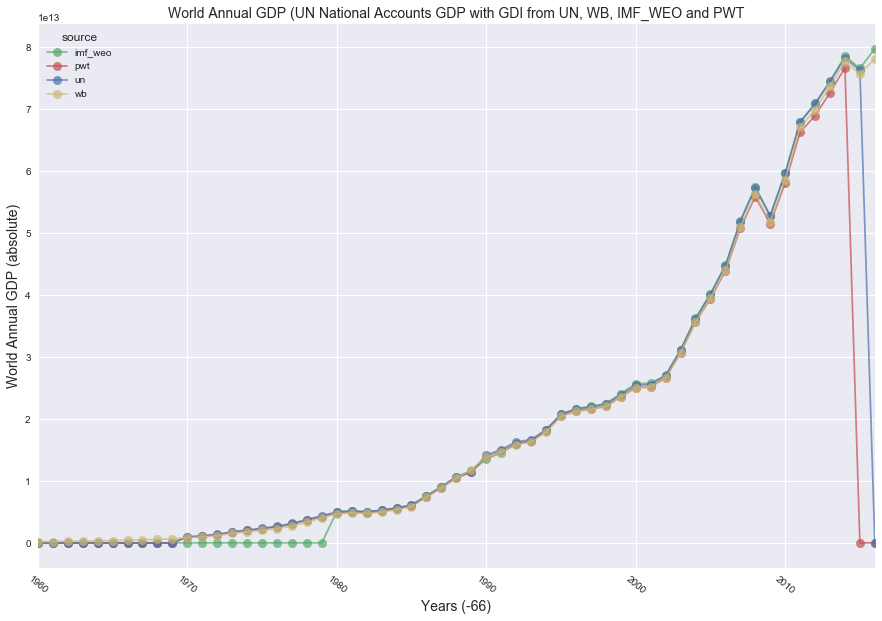

In [83]:
plot_world(da, 'UN National Accounts')

### Plot Country

In [144]:
'aaa' in da.iso.to_series()
'CHN' in da.iso.to_series()

True

In [169]:
def plot_country(_da, country_iso, country_name):
    if country_iso not in _da.iso.to_series():
        print("{0}({1}) not in data".format(country_name, country_iso))
    
    _xlab = 'Years ({0})'
    _ylab = 'Annual GDP (USD)'
    _title = '{0} Real Market GDP, 2014 values (USD)' 

    c = _da.sel(iso=country_iso, year=range(1980,2014)).to_series().unstack('source')
    c_plt = c.plot(style=['bo-','ro-', 'yo-', 'go-'], 
               figsize=(15,10), grid=True, rot=320, alpha=.7, ms=9)
    label_axes(c_plt, 
              _xlab.format('1950-2015'), 
              _ylab,
              _title.format(country_name))

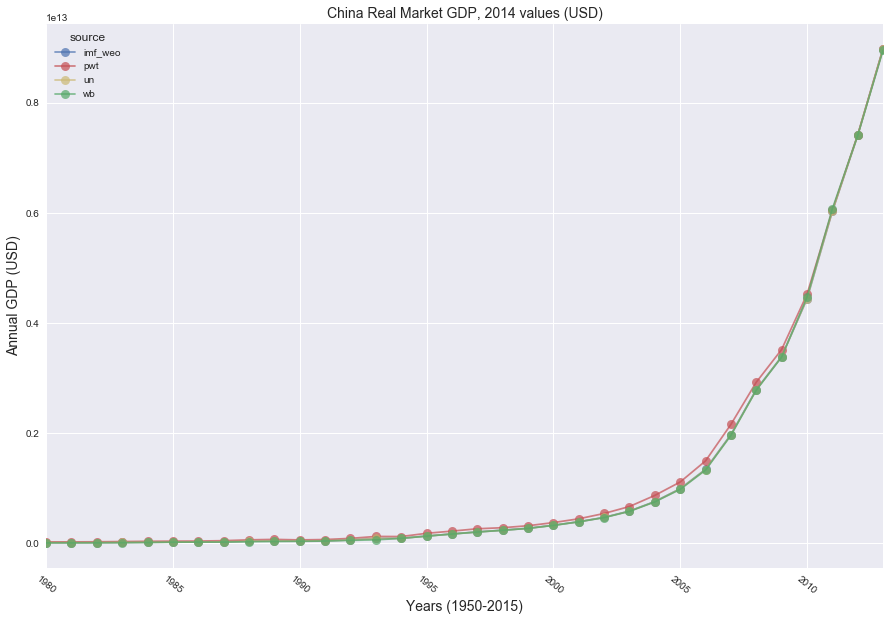

In [170]:
plot_country(da, 'CHN', 'China')

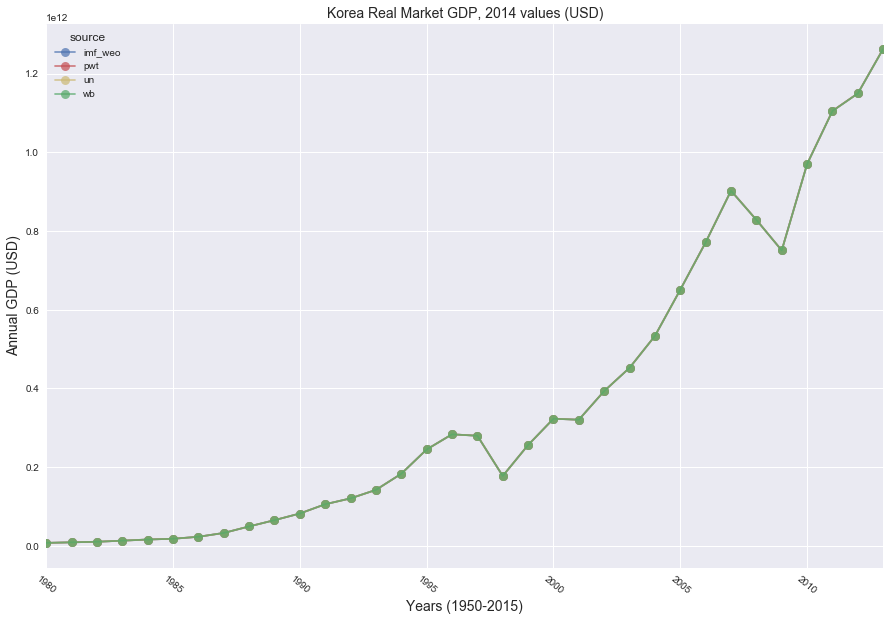

In [171]:
plot_country(da, 'KOR', 'Korea')

### Get Top 11 Highest GDP countries

USA, China, Germany, Japan, UK, India, Brazil, France, Canada, Italy, Korea

Ref - http://statisticstimes.com/economy/countries-by-projected-gdp.php

### Plus 3 additional populous

Indonesia, Mexico, Russia

populous countries- Indonesia, Mexico, Russia / Pakistan, Nigeria
Ref - https://data.worldbank.org/indicator/SP.POP.TOTL?view=map


### Get mortality countries

In [149]:
mortality_file= dir_path + 'data/meta_data/mortality_countries.csv'
mortality_countries = pd.read_csv(mortality_file)
mortality_countries.sort_values(by='iso', inplace=True)

In [150]:
mortality_country_map = mortality_countries.set_index('iso').to_dict()['countryName']
'''
{'AUT': 'Austria',
 'BEL': 'Belgium',
 'BGR': 'Bulgaria',...
'''

"\n{'AUT': 'Austria',\n 'BEL': 'Belgium',\n 'BGR': 'Bulgaria',...\n"

/Users/mlimb/miniconda/envs/rhg/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


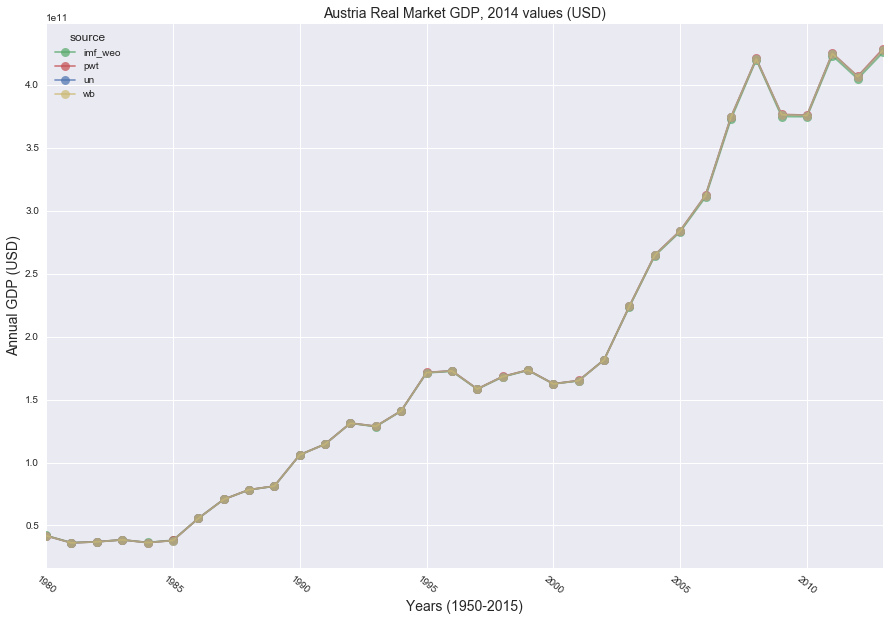

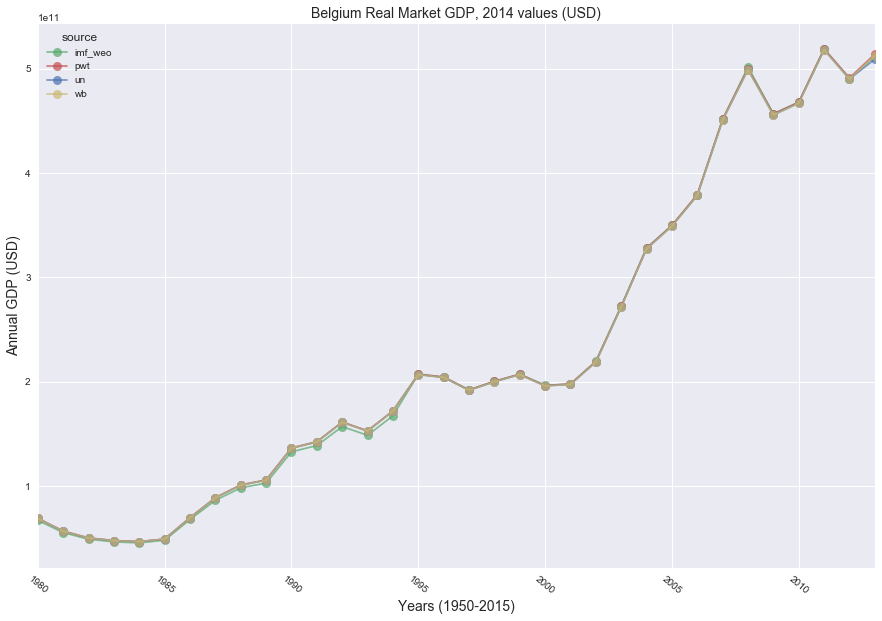

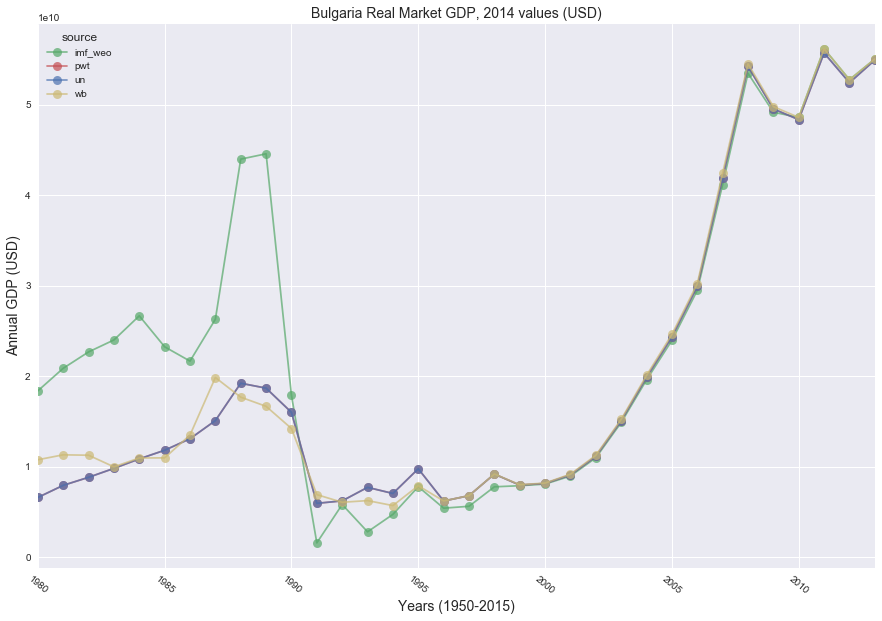

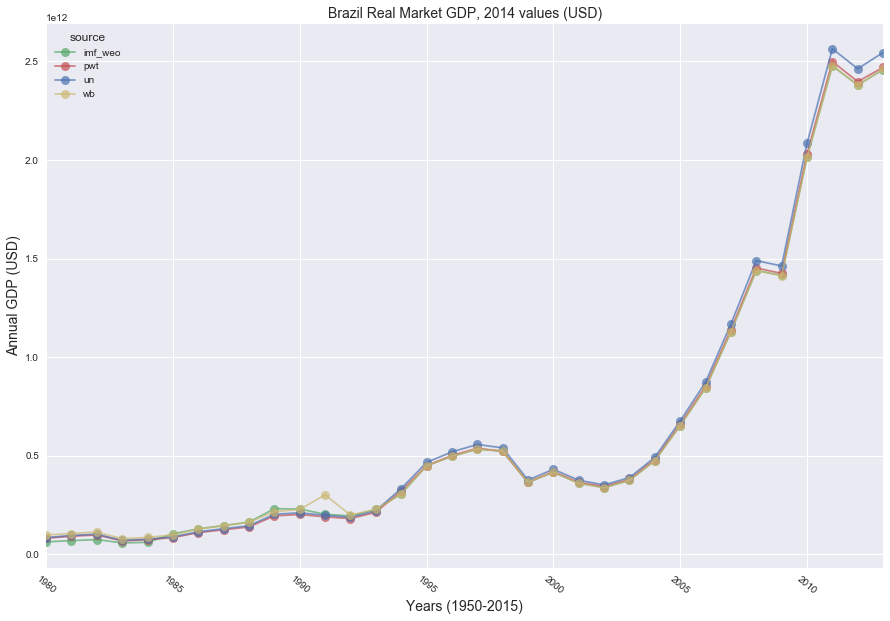

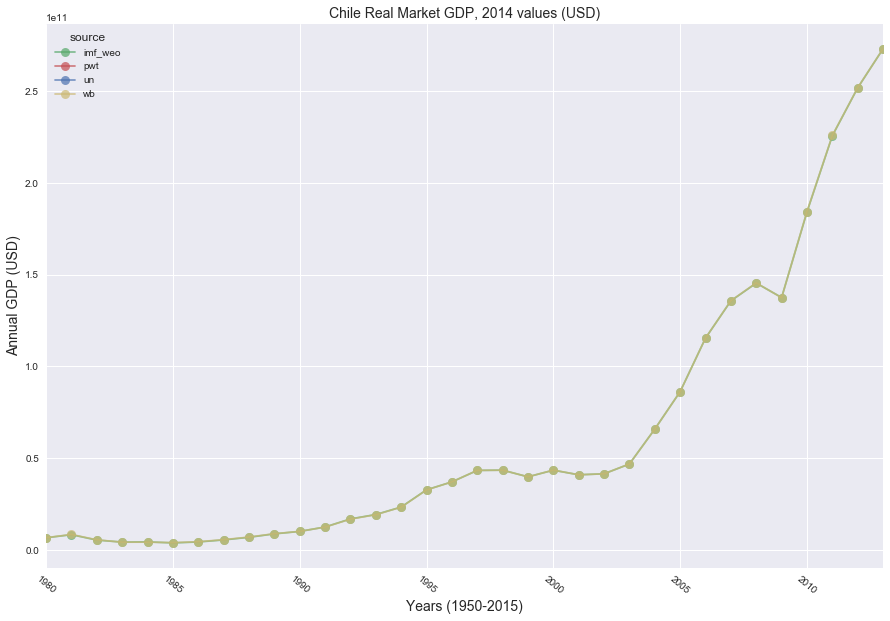

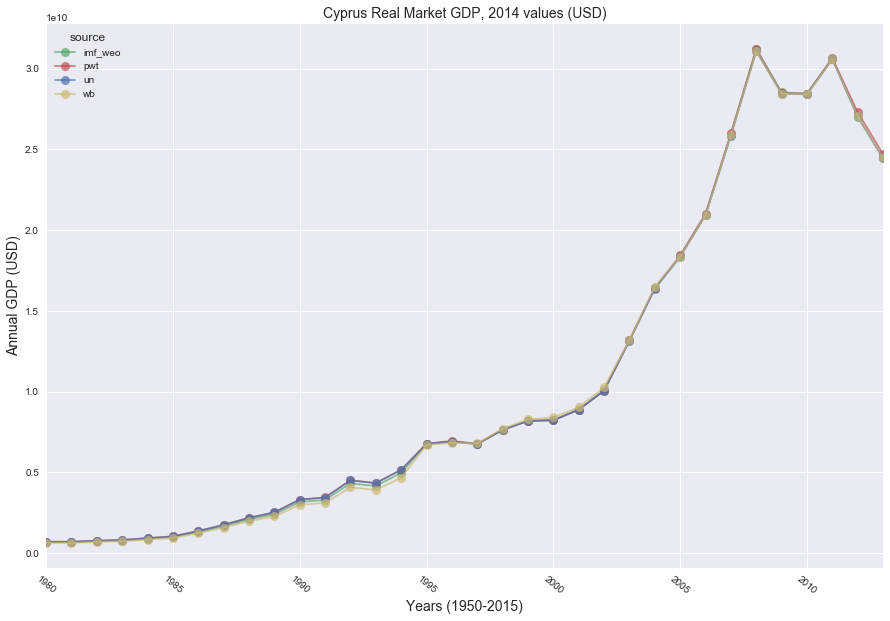

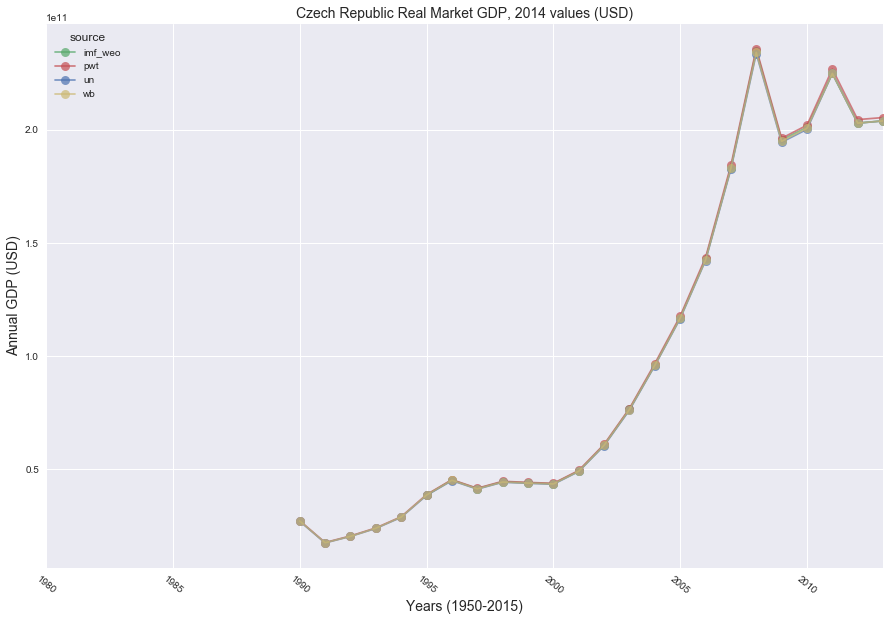

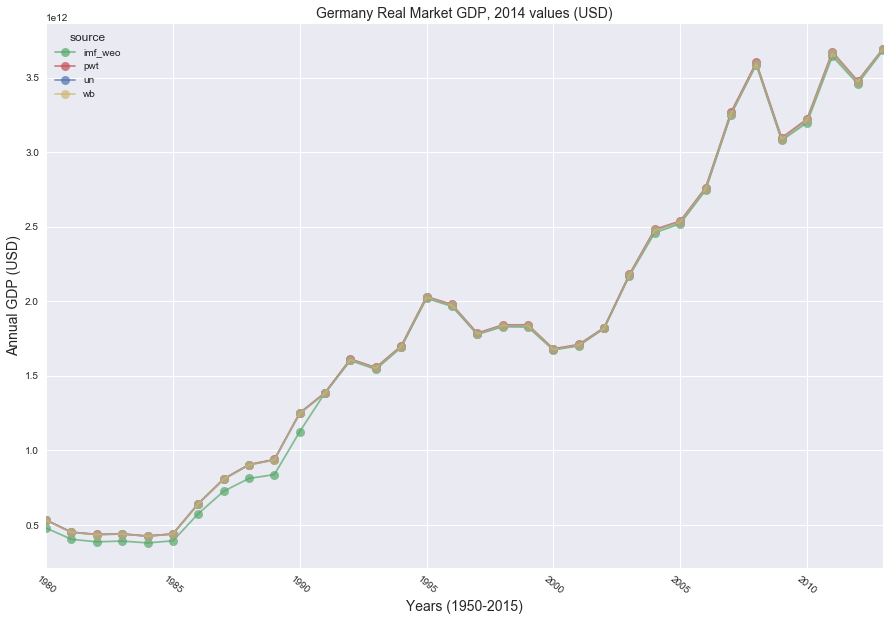

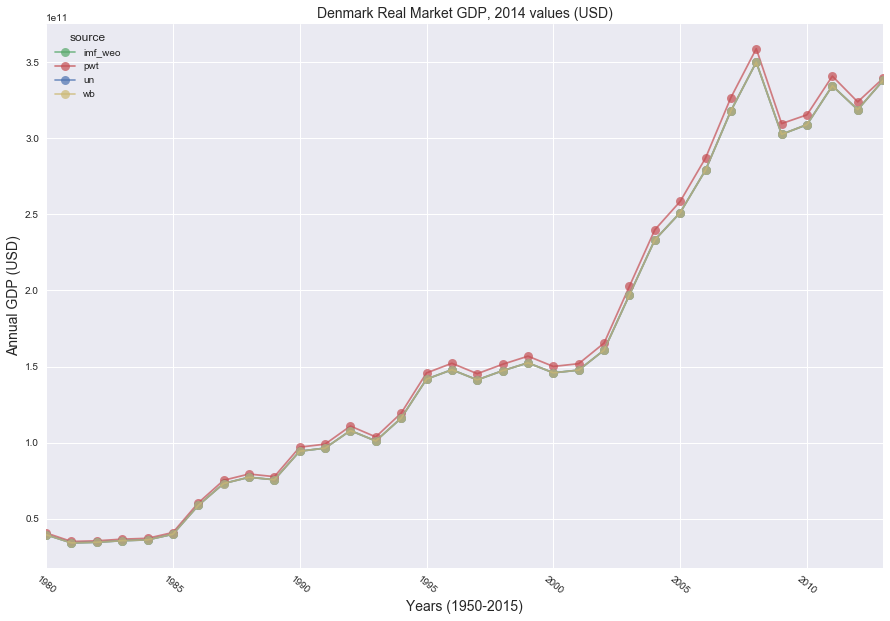

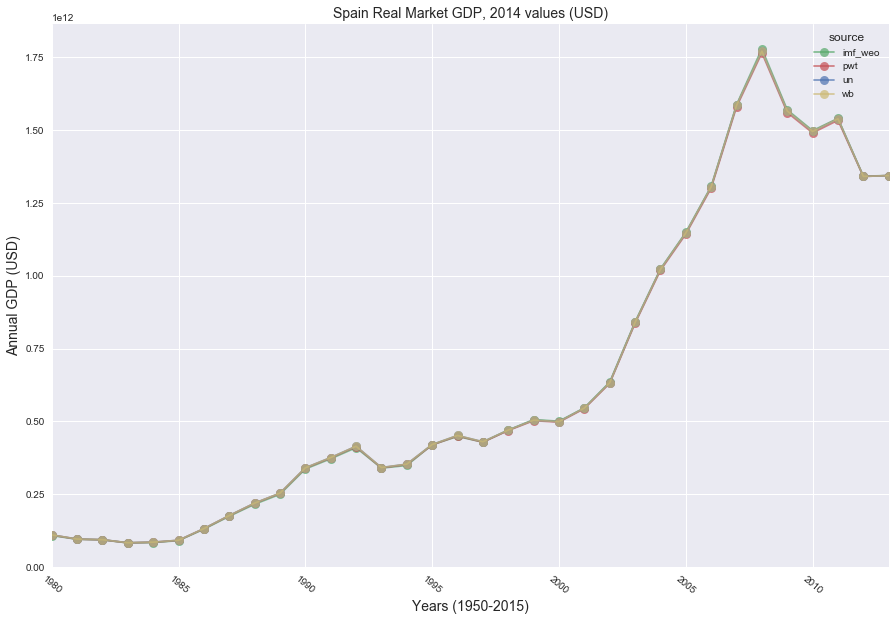

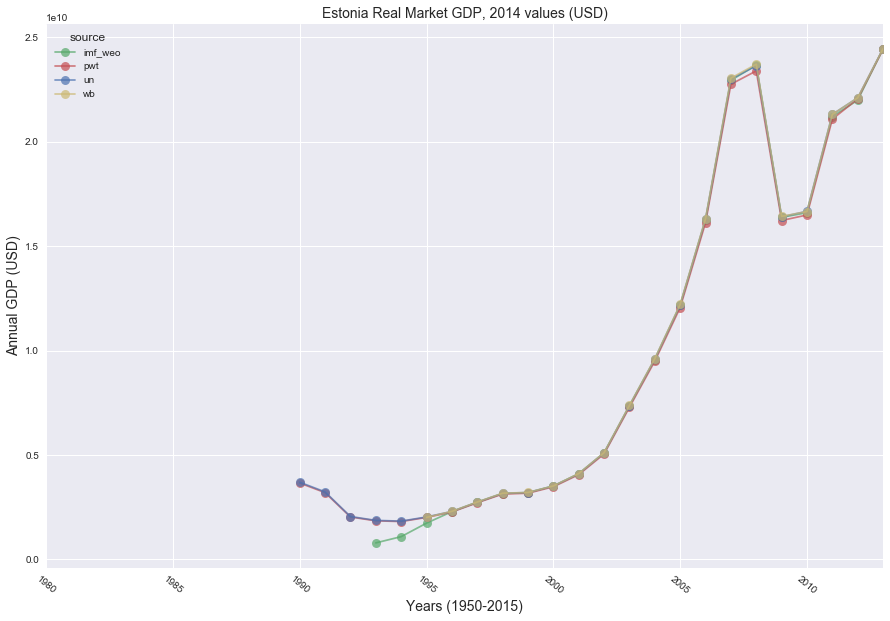

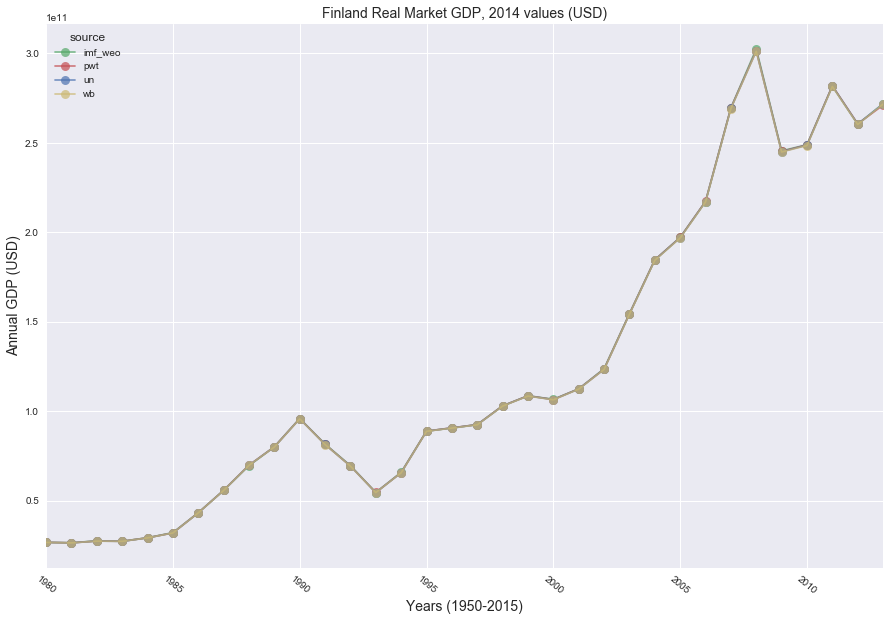

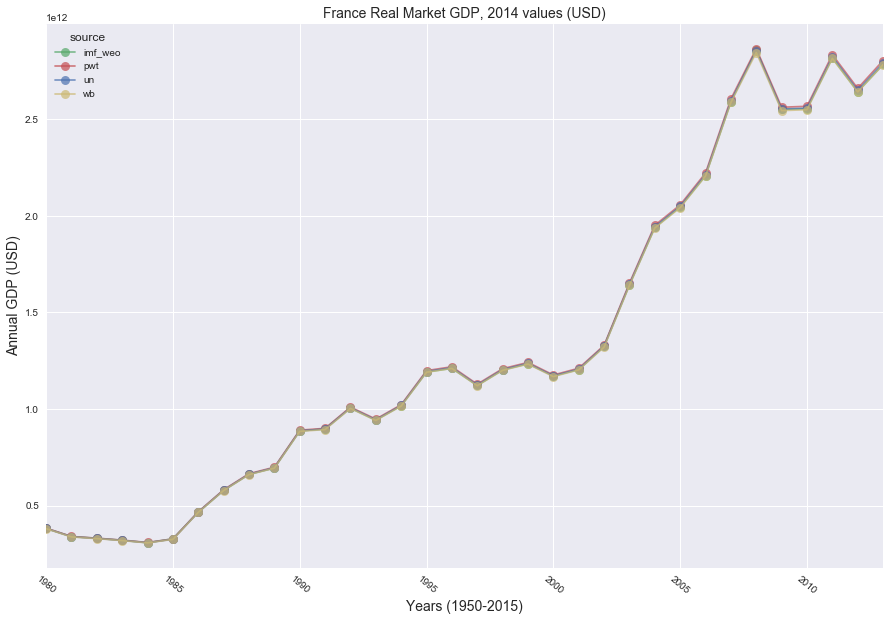

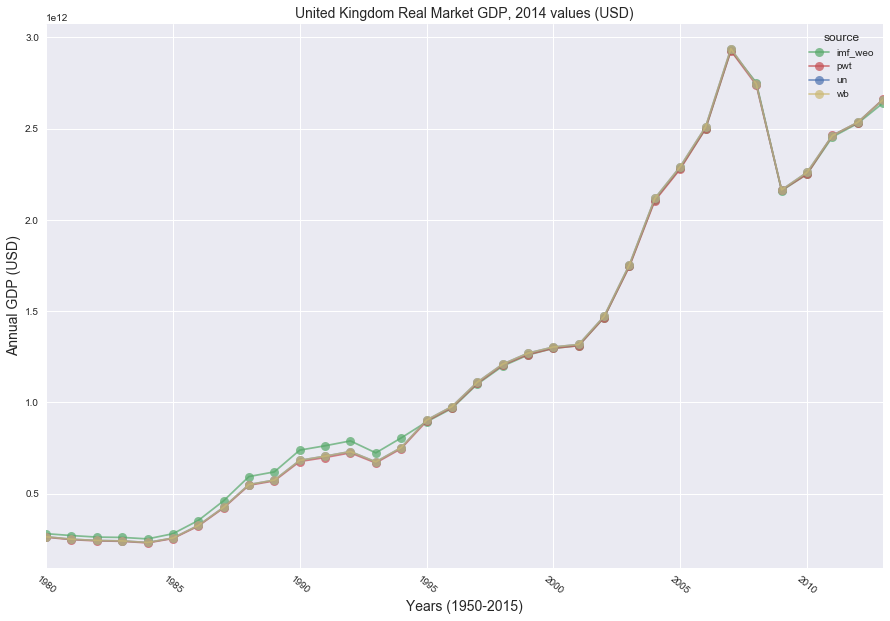

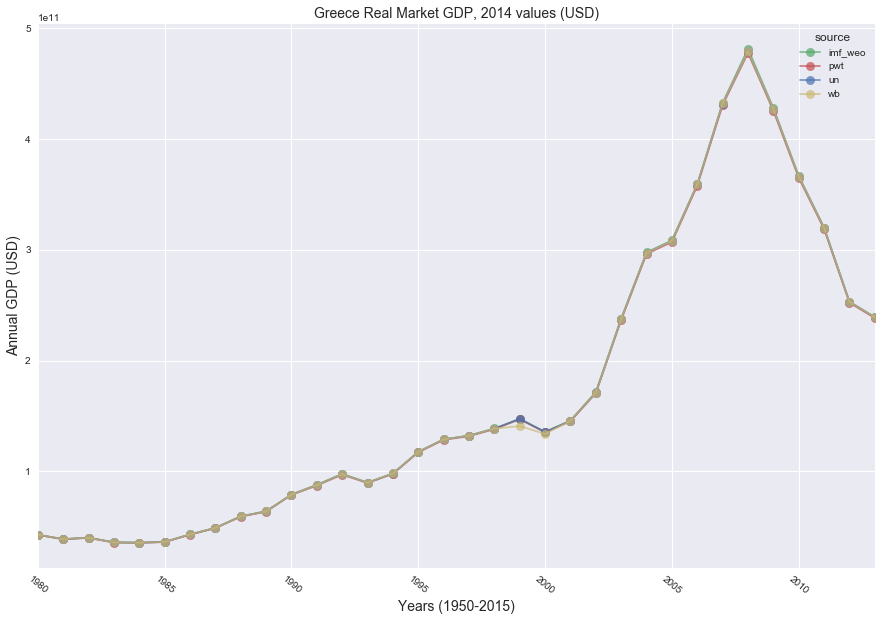

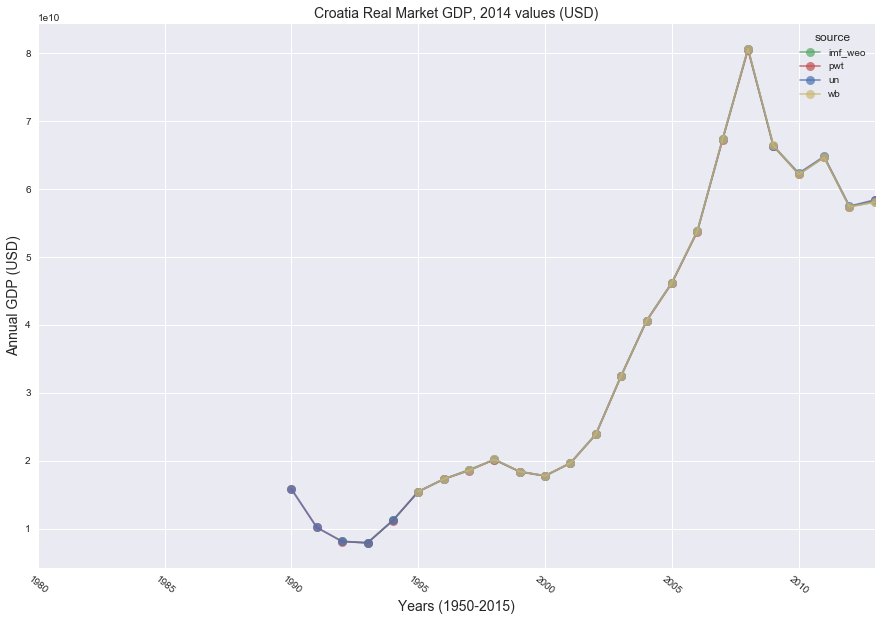

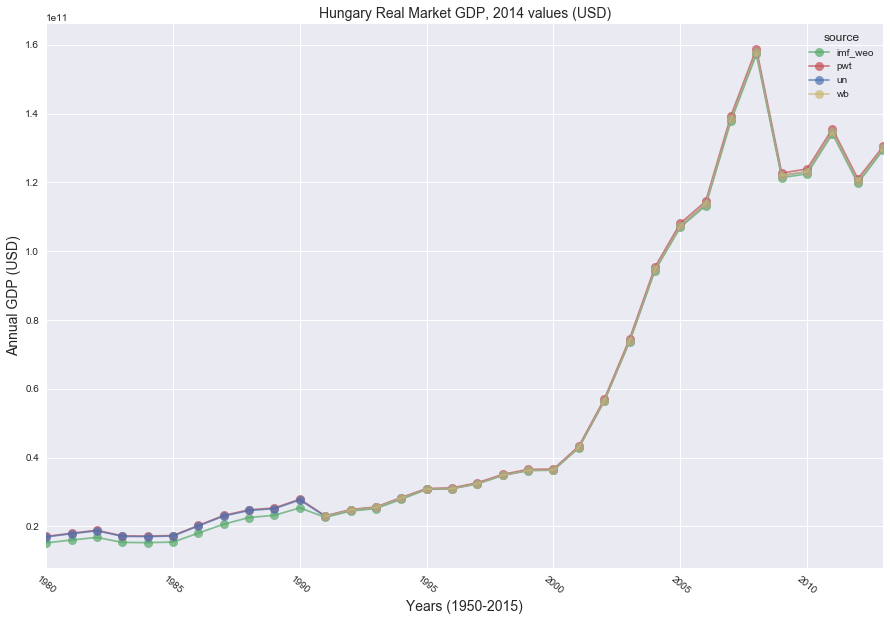

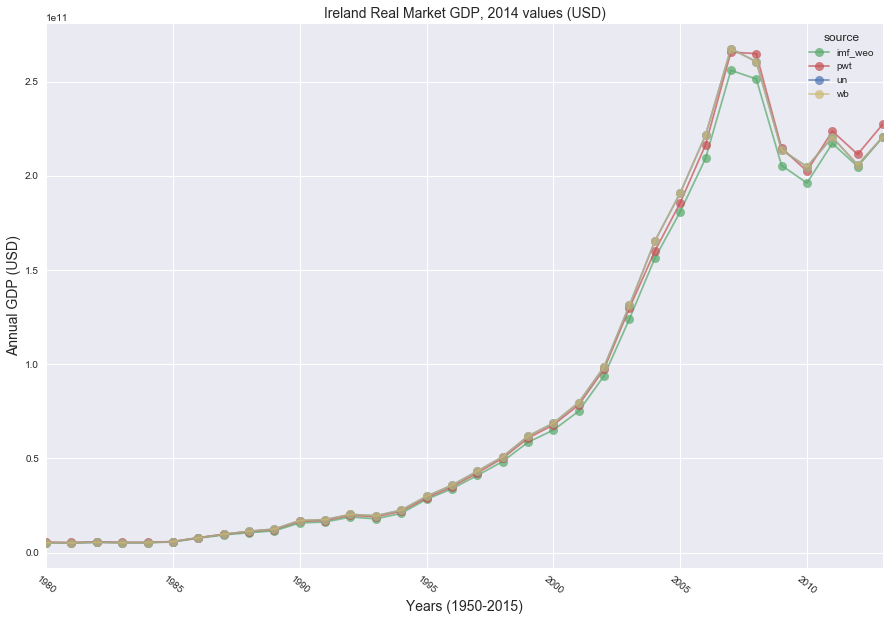

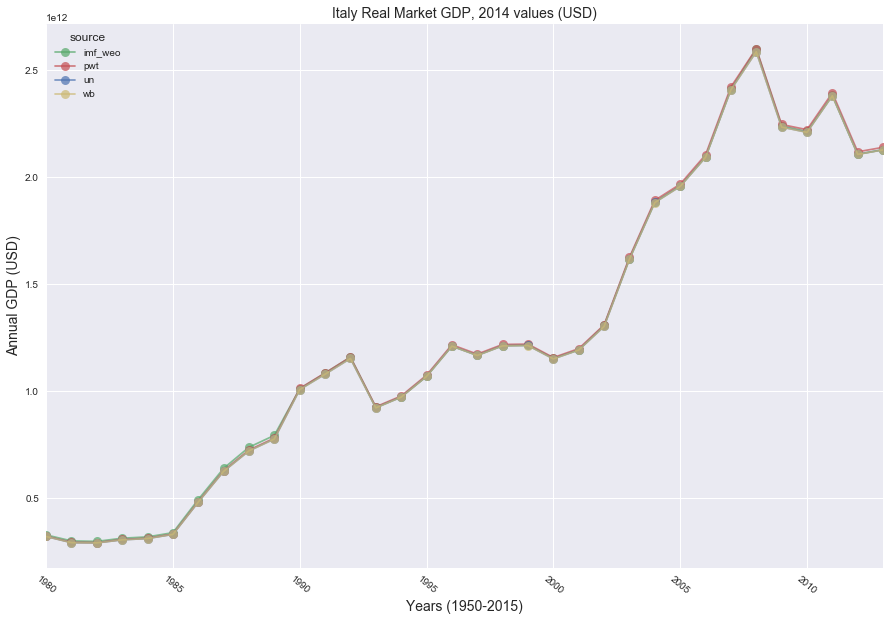

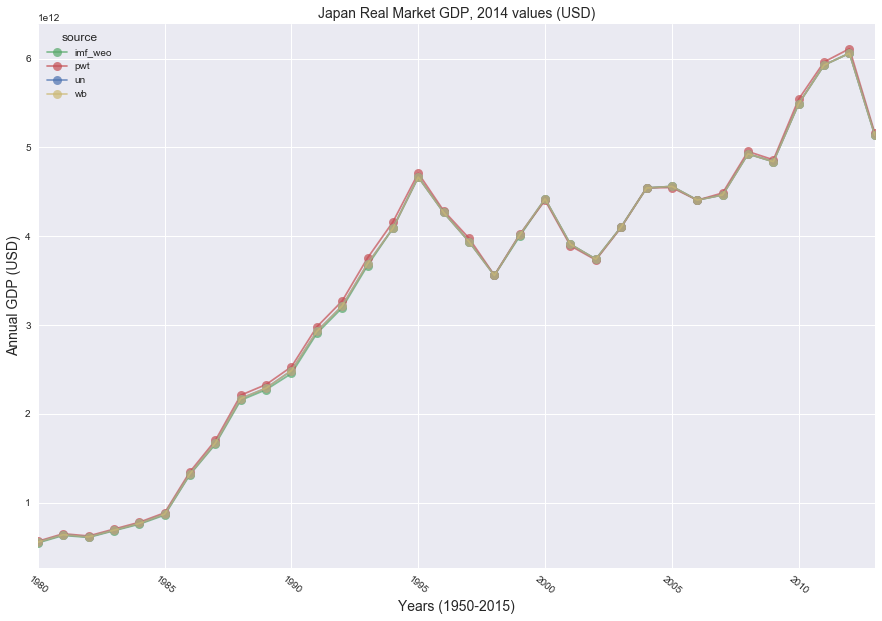

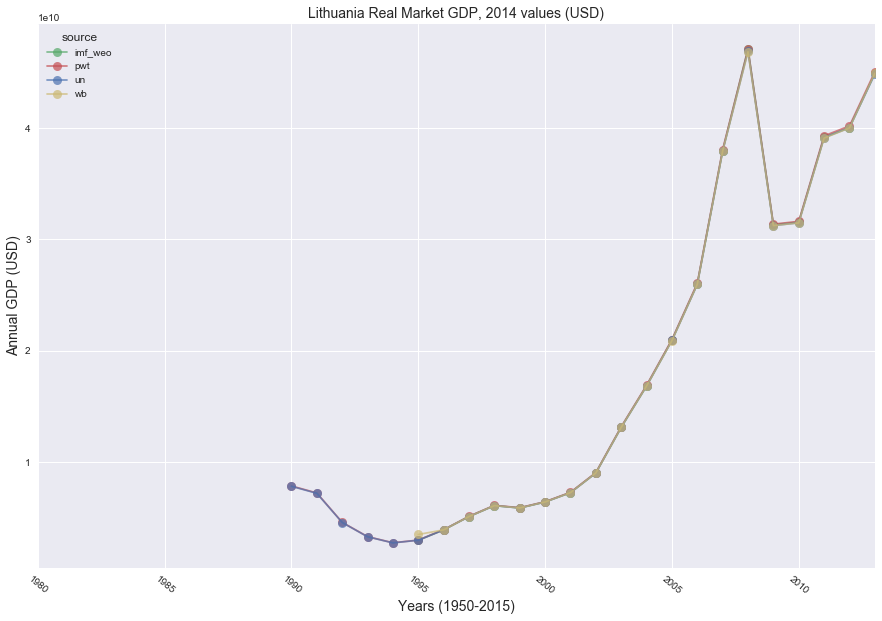

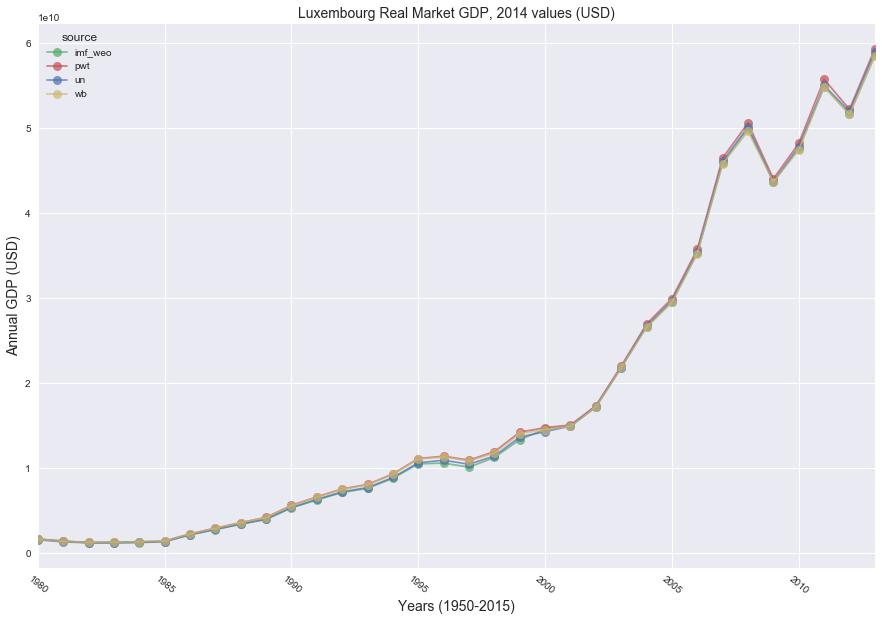

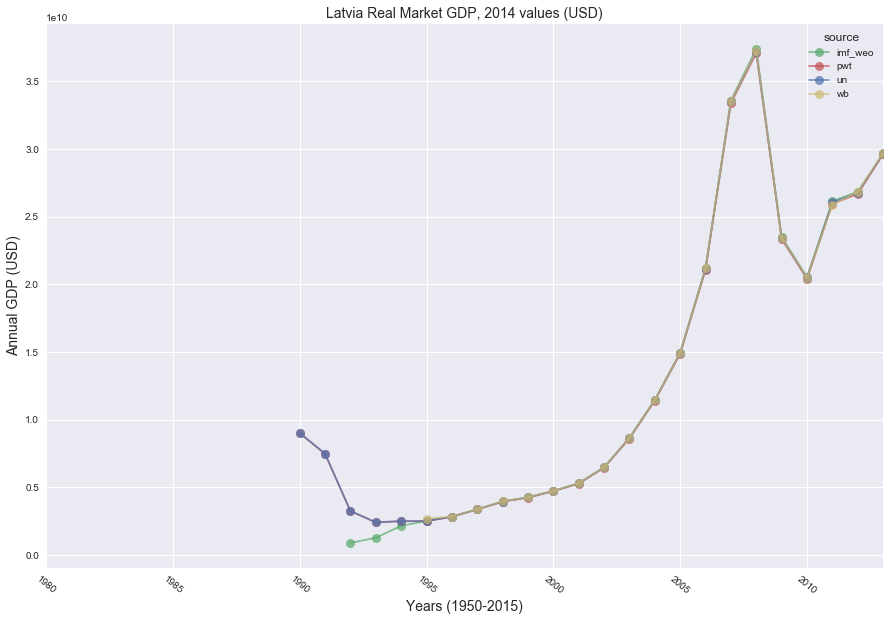

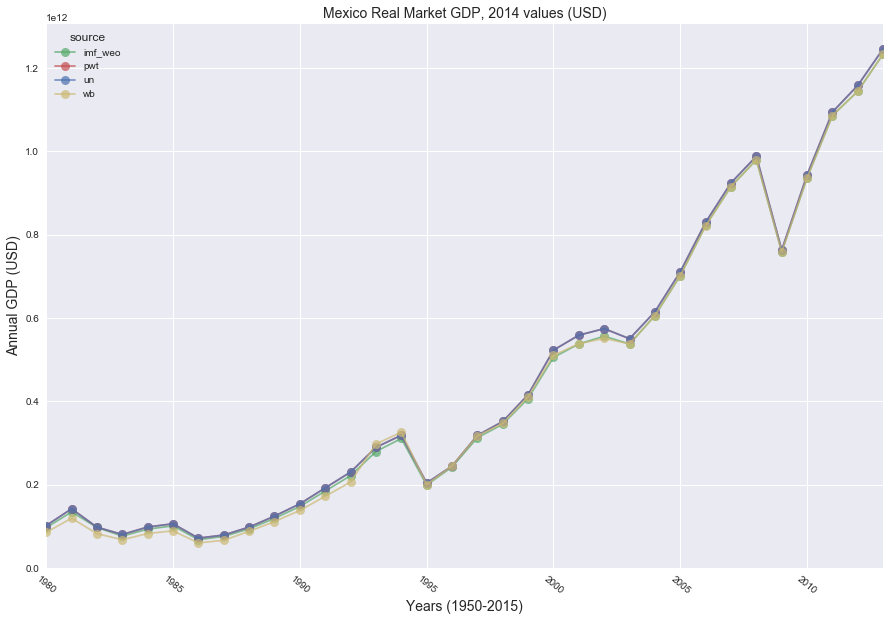

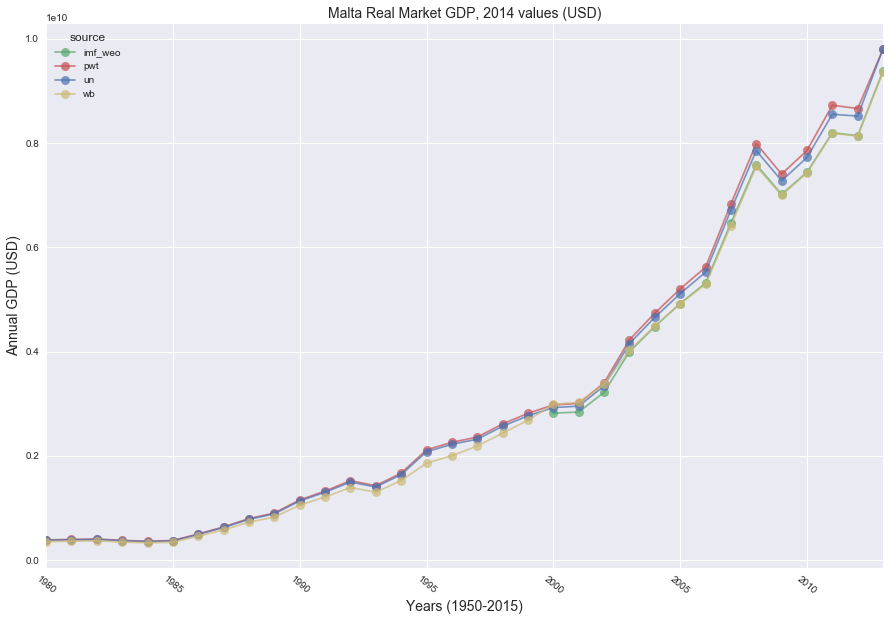

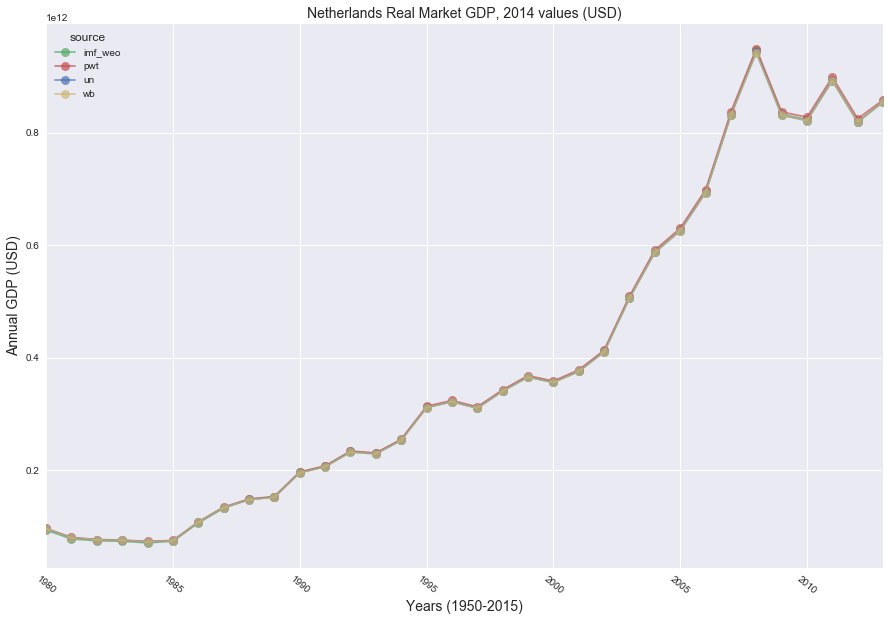

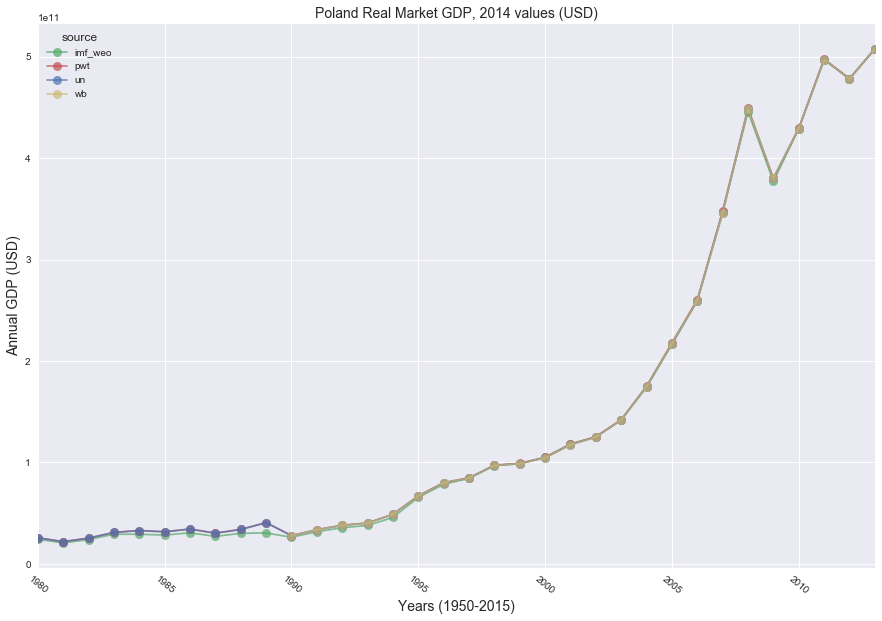

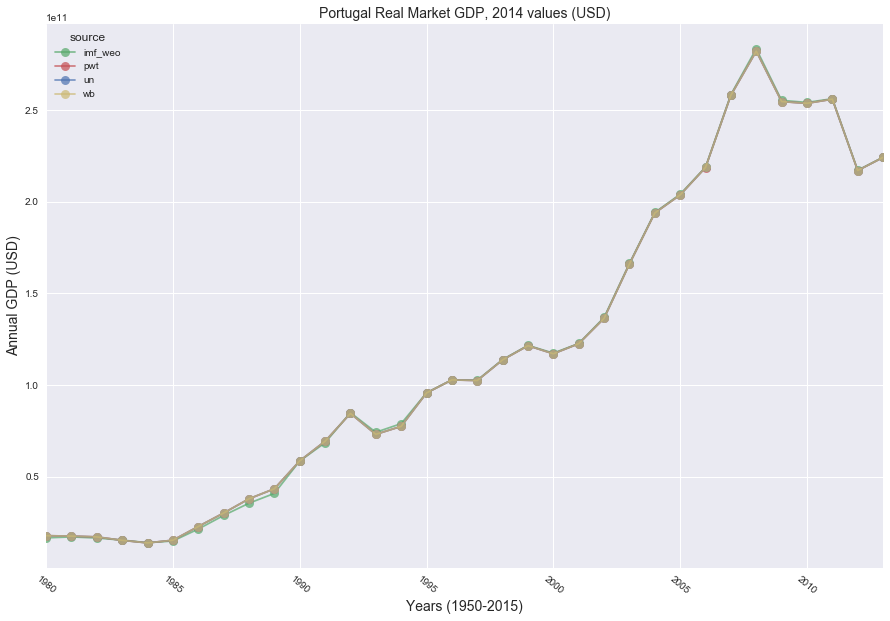

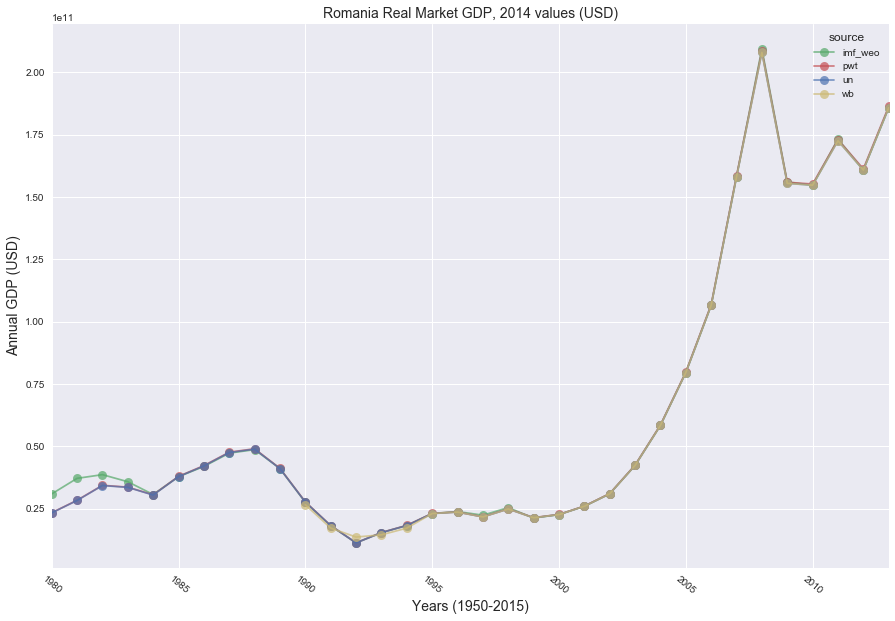

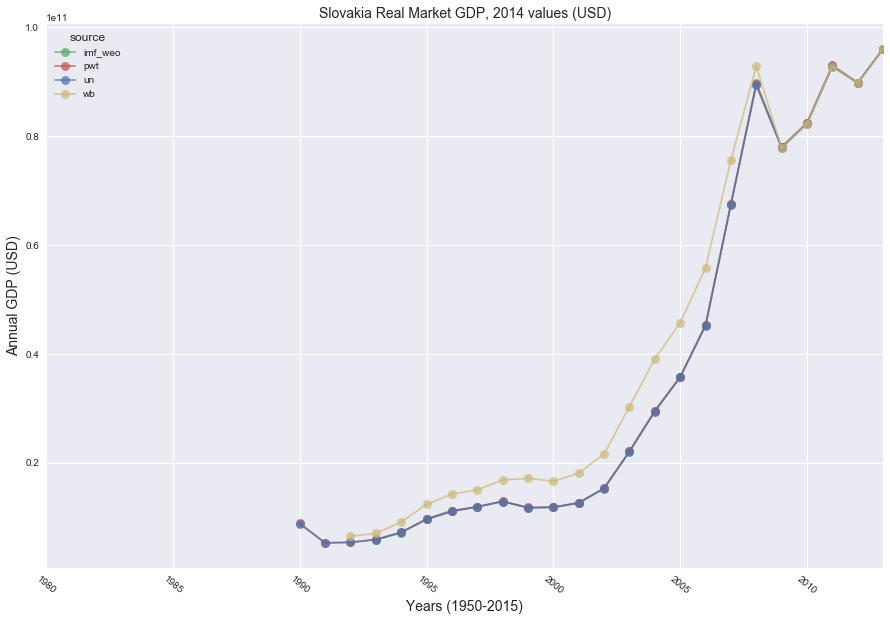

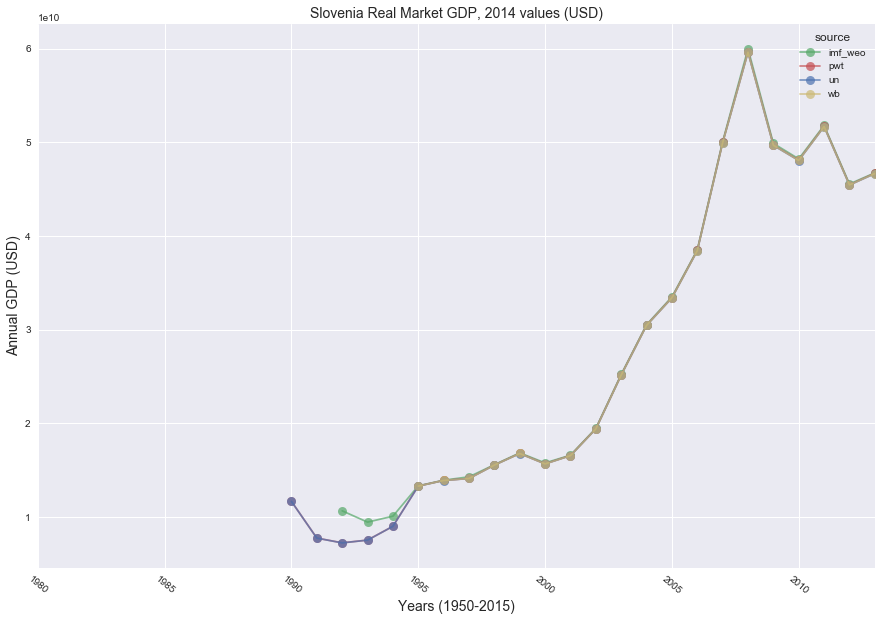

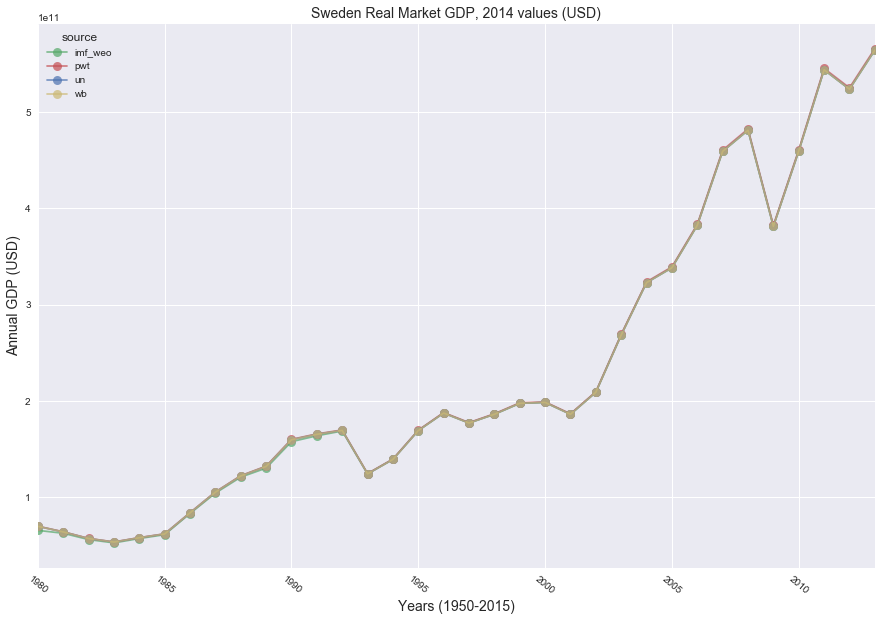

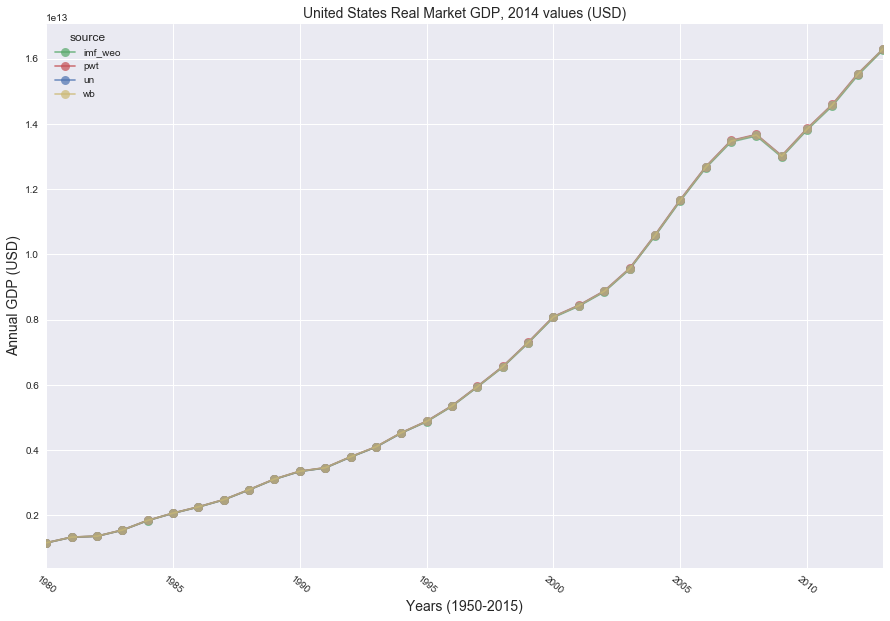

In [161]:
for _iso, _name in mortality_country_map.items():
    plot_country(da, _iso, _name)